                               #######             
                              #                    
        ############ -#####+.##     ######         |	DataDrivenConstruction.io
        ##+########## .-##+ #-   .+########        |	
        ####     ####.     ..    #      ###        |	Dive into the future of flexibility in processing data 
        ####     .#+#.     #    .# .               |	without using BIM tools!
        ####     -#+#.    #.     .#.               |	
        ####      #+#.   ##-                       |	
        ####     ####        #.  #     -####       |	
        ############  .###+ #. ############        |
        #########.   +#### #+.   ########          |	If you have any questions, concerns or special requests,
                           #+                      |	please contact us at info@datadrivenconstruction.io	
                          #                        
                         #  



Conversion Done for Project 2021racbasicsampleproject
Conversion Done for Project 2021rmebasicsampleproject
Conversion Done for Project 2021rstadvancedsampleproject
Conversion Done for Project 2022TechnicalschoolcurrentmV2
Conversion Done for Project BIM_Projekt_Golden_Nugget-Architektur_und_Ingenieurbau
Conversion Done for Project Eco_Estate_Villas
Conversion Done for Project Walls_Curtain-Walls_Alutech_ALT-F50_transom-mullion
C:\Revit_Projects\Batch_Process_ChatGPT\\2021racbasicsampleproject_rvt.xlsx


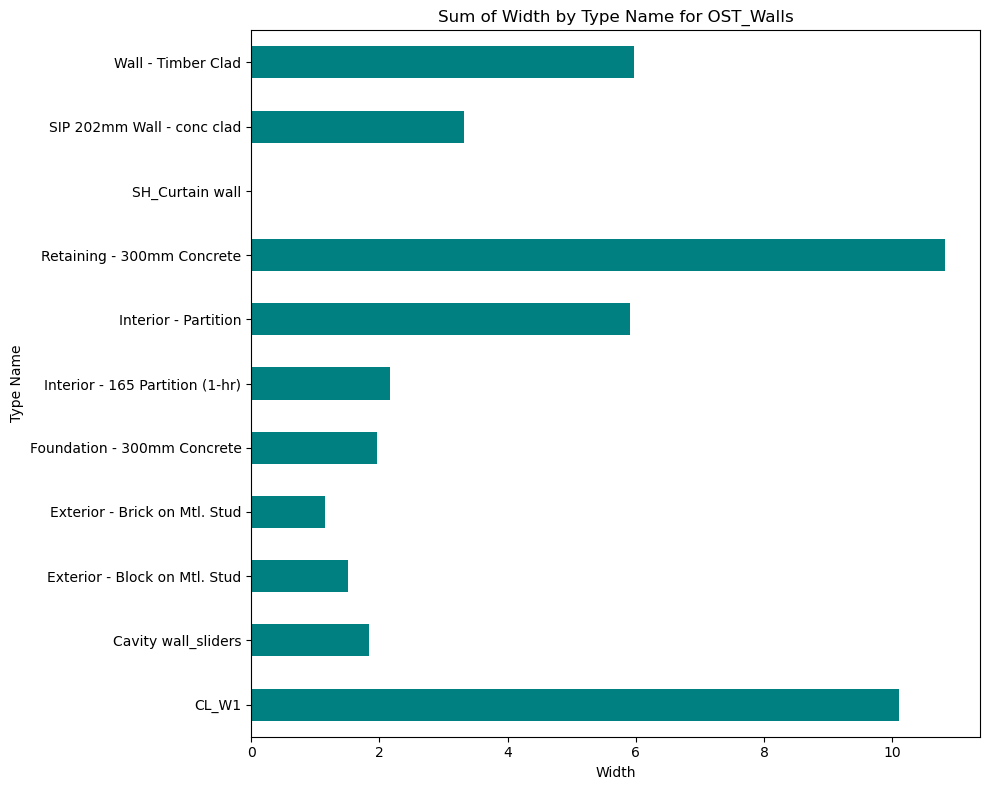

C:\Revit_Projects\Batch_Process_ChatGPT\\2021rmebasicsampleproject_rvt.xlsx


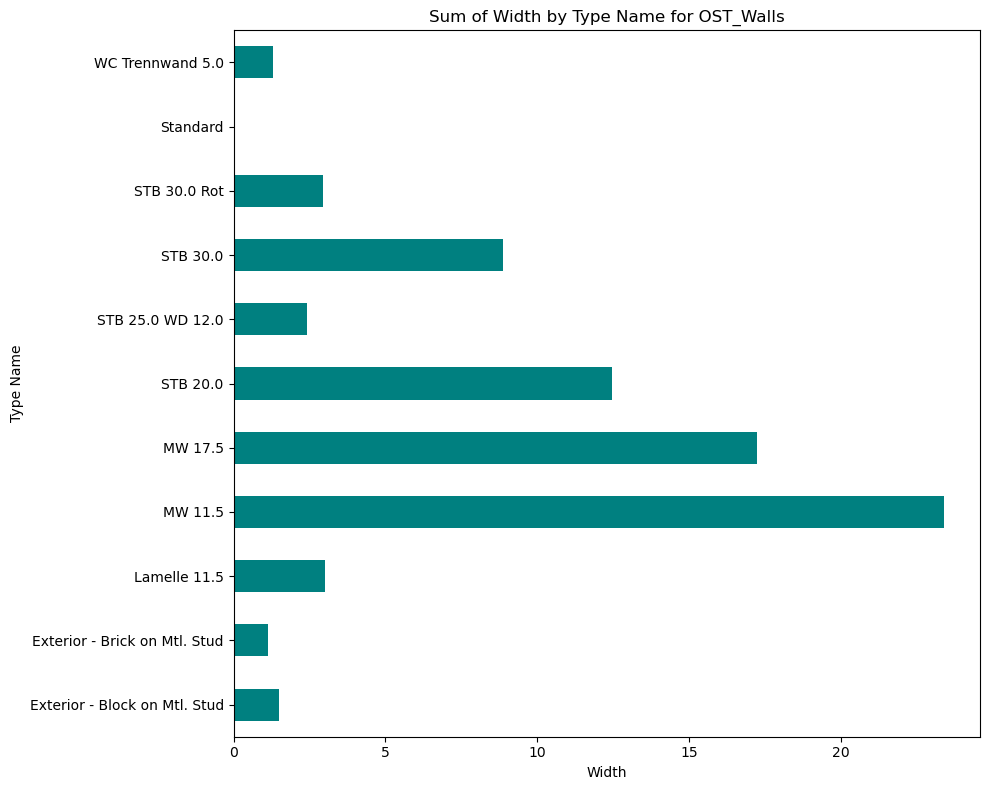

C:\Revit_Projects\Batch_Process_ChatGPT\\2021rstadvancedsampleproject_rvt.xlsx


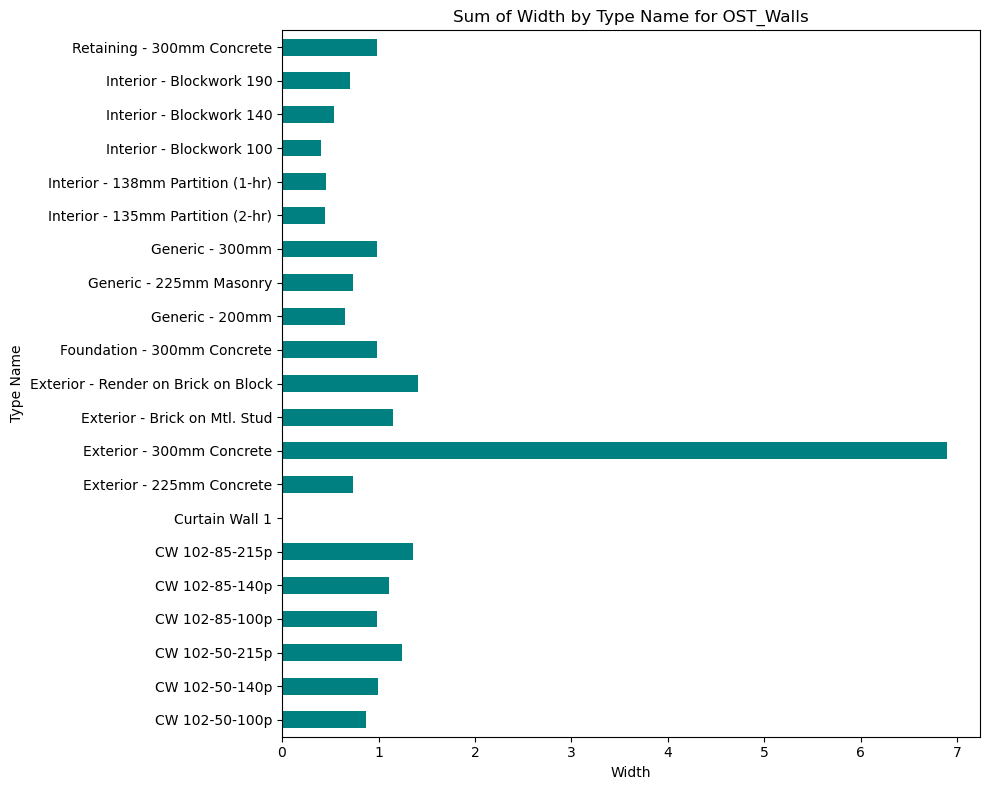

C:\Revit_Projects\Batch_Process_ChatGPT\\2022TechnicalschoolcurrentmV2_rvt.xlsx


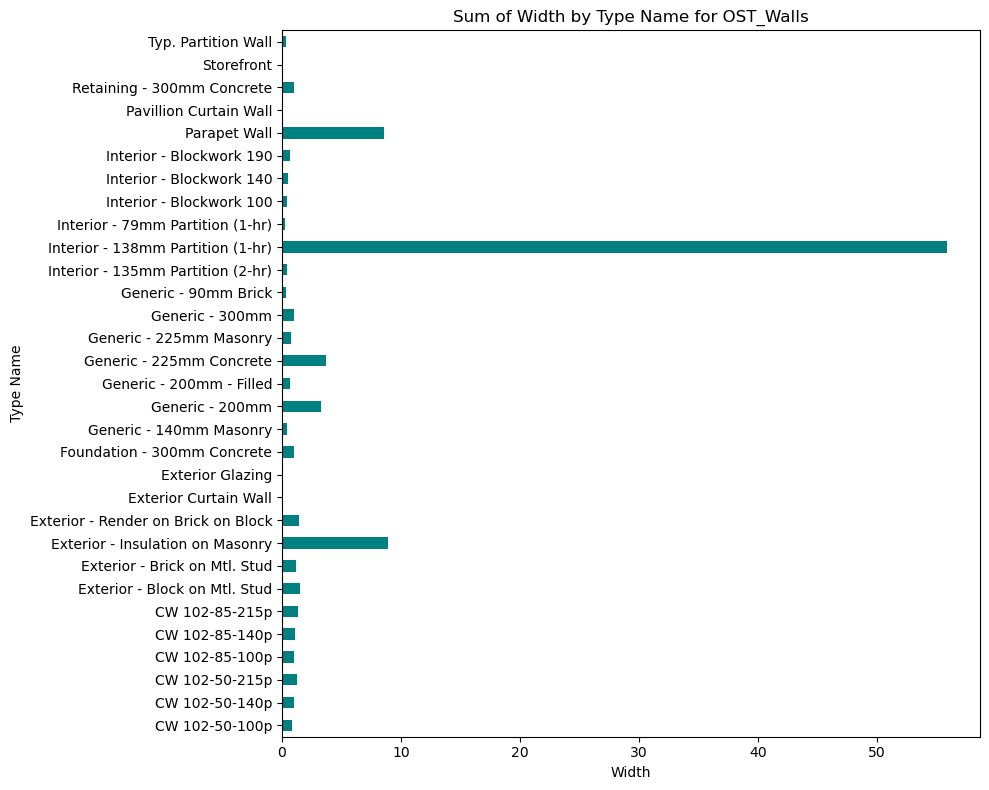

C:\Revit_Projects\Batch_Process_ChatGPT\\BIM_Projekt_Golden_Nugget-Architektur_und_Ingenieurbau_rvt.xlsx


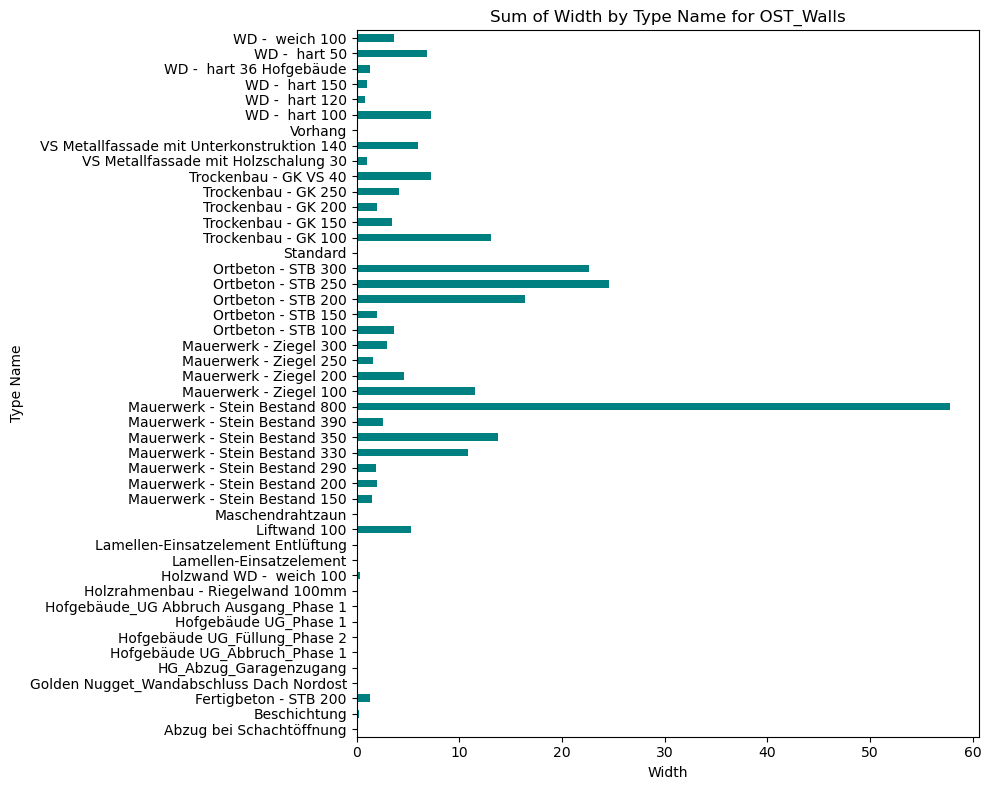

C:\Revit_Projects\Batch_Process_ChatGPT\\Eco_Estate_Villas_rvt.xlsx


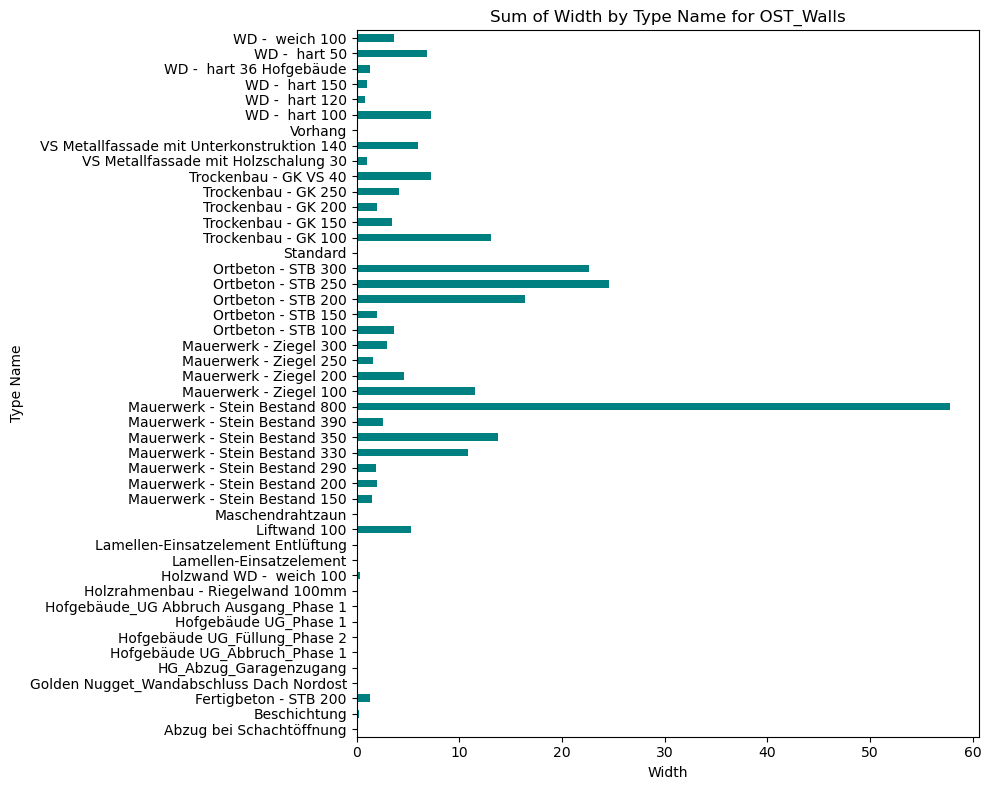

C:\Revit_Projects\Batch_Process_ChatGPT\\Walls_Curtain-Walls_Alutech_ALT-F50_transom-mullion_rvt.xlsx


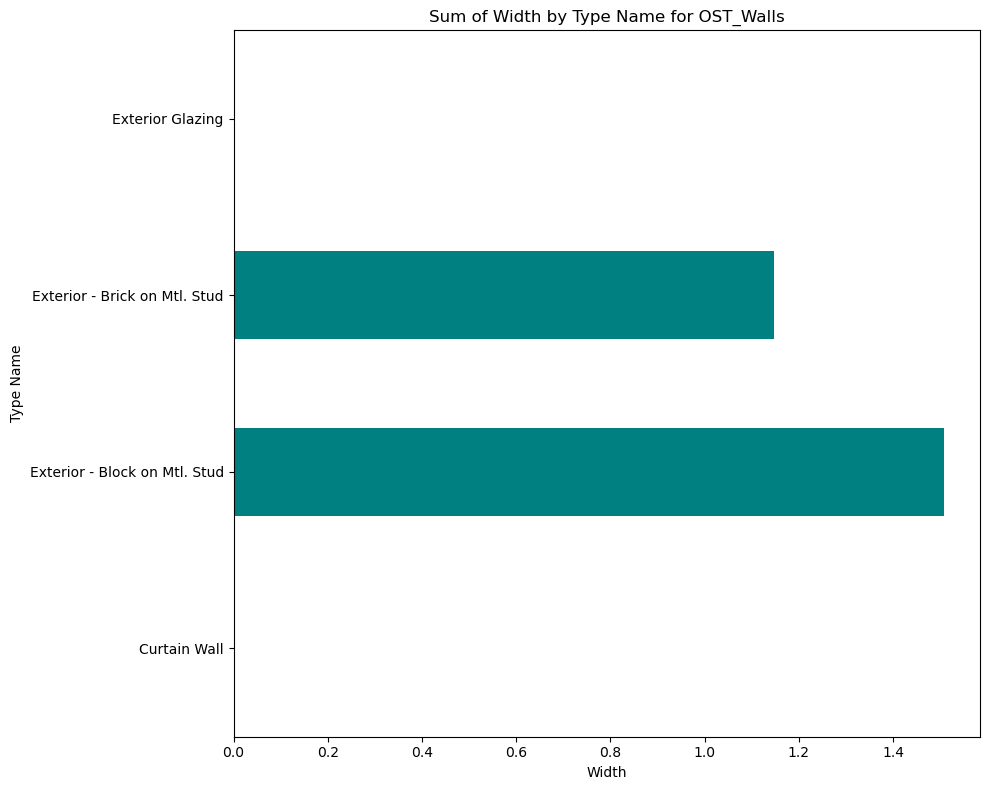

In [39]:
#------------------------------------Input data-----------------------------------

# Path address to the folder where RvtExporter.exe|IfcExporter.exe converter is located
path_conv = r'C:\DDC\DDC_Converter\DDC_Converter_Revit_and_IFC_FULL\datadrivenlibs\\'
# Path address of the folder where Revit|IFC files are located
path = r'C:\Revit_Projects\Batch_Process_ChatGPT\\'

#-----------------------------------------------------------------------------------------

import os
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

def convert_and_wait(path_conv, exporter_name, file_path, extension):
    subprocess.Popen([os.path.join(path_conv, exporter_name), file_path], cwd=path_conv)
    output_file = os.path.join(path, f"{os.path.splitext(file)[0]}_{extension}.xlsx")
    while not os.path.exists(output_file):
        time.sleep(0.5)
    print(f"Conversion Done for Project {os.path.splitext(file)[0]}")  
    
# Ensure output directory exists
os.makedirs(path, exist_ok=True)
# Conversion process from RVT and IFC
for file in os.listdir(path):
    full_path = os.path.join(path, file)
    if file.endswith('.ifc'):
        convert_and_wait(path_conv, 'IfcExporter.exe', full_path, 'ifc')
    elif file.endswith('.rvt'):
        convert_and_wait(path_conv, 'RvtExporter.exe', full_path, 'rvt')
        
        
#-------------------------------- Batch Processing ---------------------------------------------------------


def process_xlsx_files(folder_path, s_cat):
    all_grouped_data = pd.Series(dtype=float)  # Initialize the Series
    for filename in os.listdir(folder_path):
        if filename.endswith(".xlsx"):
            file_path = os.path.join(folder_path, filename)

            # Load the XLSX file
            print(file_path)
            data = pd.read_excel(file_path, sheet_name="Project_Data")
            
# ==================================== < Chat_GPT > ==============================================


            # ================================
            # Code Block 1: Filtering data
            # ================================
           # Filtering data for 'OST_Walls' category
            walls_data = data[data['Category'] == 'OST_Walls']

            # Check if 'Type Name' and 'Width' columns are present
            if 'Type Name' in walls_data.columns and 'Width' in walls_data.columns:
                # Group by 'Type Name' and sum 'Width'
                grouped_walls_data = walls_data.groupby('Type Name')['Width'].sum()

                # Preparing the data for the horizontal bar chart
                grouped_walls_data
            else:
                error_message = "Either 'Type Name' or 'Width' column is missing in the data."



            # ================================
            # Code Block 2: Creating a bar chart
            # ================================
            if not grouped_walls_data.empty:
            # Creating a horizontal bar chart
                plt.figure(figsize=(10, 8))
                grouped_walls_data.plot(kind='barh', color='teal')
                plt.title('Sum of Width by Type Name for OST_Walls')
                plt.xlabel('Width')
                plt.ylabel('Type Name')
                plt.tight_layout()

                # Displaying the bar chart
                plt.savefig(os.path.join(path,filename[:-4] + "bar_cahrt.png"))
                plt.show()
                plt.close()
                


                
# ==================================== < / Chat_GPT > ==============================================    

        
# Example call to the function
process_xlsx_files(path, "OST_Walls")



     
